### ModuleDevelop
モジュールの開発用ファイル

In [1]:
import MDUS
from MDUS import Analysis

import numpy as np
import pandas as pd
from scipy import interpolate

In [2]:
data = MDUS.Datas()
data.Input(orbit=199,integrate=False,types=["MAG","SCAN"])
data.Info()

Data Type
	Multi
Input Type
	MAG
	SCAN
Integrate
	False


In [5]:
data.value["MAG"].value

,X_MSO,Y_MSO,Z_MSO,Bx,By,Bz,|B|
date,,,,,,,
2011-06-25 21:16:20,1.110545,0.607811,1.024839,57.232,-41.049,-28.441,75.956650
2011-06-25 21:16:21,1.109468,0.607397,1.025242,61.888,-75.316,0.683,97.483798
2011-06-25 21:16:22,1.108390,0.606982,1.025643,43.603,-114.514,-4.146,122.604515
2011-06-25 21:16:23,1.107312,0.606568,1.026045,-4.793,-85.008,-24.141,88.499270
2011-06-25 21:16:24,1.106234,0.606153,1.026446,47.875,-67.082,-20.090,84.826991
...,...,...,...,...,...,...,...
2011-06-25 22:45:34,-1.320434,-0.929617,-2.924175,29.293,13.729,10.719,34.080233
2011-06-25 22:45:35,-1.320221,-0.929613,-2.924877,29.302,18.430,3.084,34.753175
2011-06-25 22:45:36,-1.320007,-0.929610,-2.925579,30.406,16.749,2.241,34.786145


(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': '2012/02/22 11:00:00 - 2012/02/22 12:29:59'}, xlabel='UTC', ylabel='Magnetic Field [nT]'>)

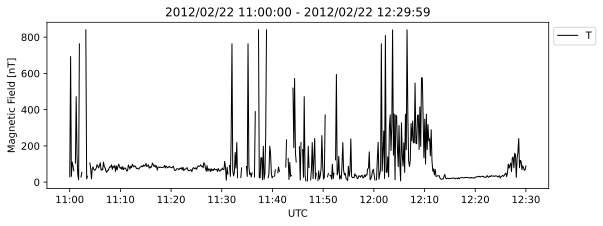

In [23]:
data_scan = MDUS.ScanData()
data_scan.Input(start='2012/02/22 11:00:00', end='2012/02/22 12:30:00')
data_scan.DataIntegration()
data_scan.NTP()

data_scan.PlotMag(component={'T':'black'})

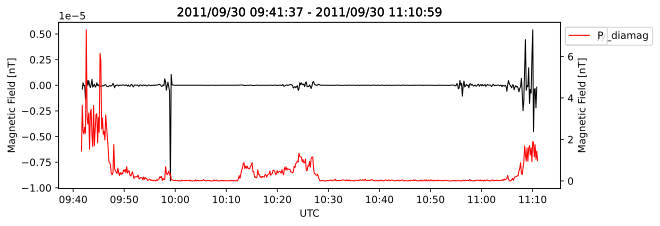

In [2]:
orbit = 394
data_scan = MDUS.ScanData()
data_scan.Input(orbit=orbit)
data_scan.DataIntegration()
data_scan.NTP()
data_scan.DiamagCurrent()

fig, ax = data_scan.PlotMag(component={'Jy_diamag':'black'})
ax2 = ax.twinx()
fig, ax = data_scan.PlotMag(component={'P':'red'},fig=fig,ax=ax2)  

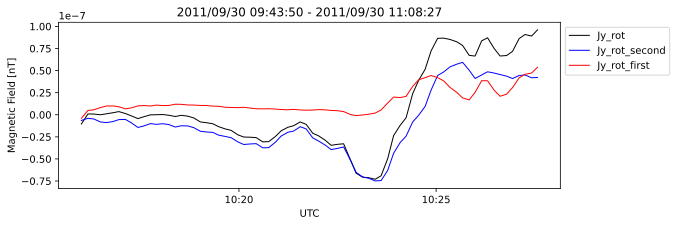

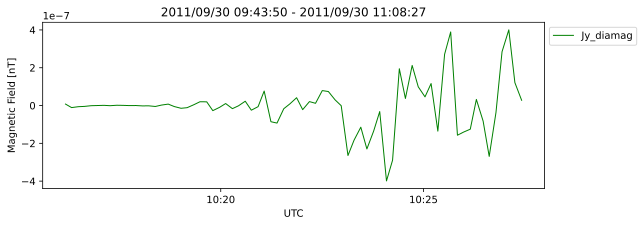

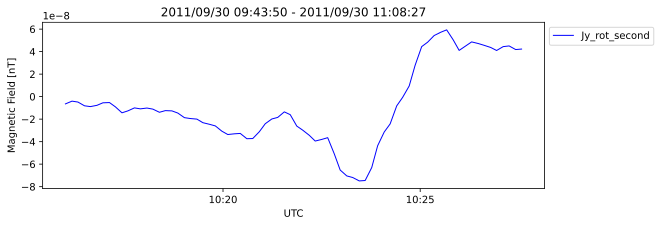

In [12]:
orbit = 394
data_mag = MDUS.MagData()
data_mag.Input(orbit=orbit,sec=10)
data_mag.MoveAverage(13)
data_scan = MDUS.ScanData()
data_scan.Input(orbit=orbit)
data_scan.DataIntegration()
data_scan.CalcKTH22(rc=False,ns=False)
data_scan.MoveAverage(13)
data_scan.NTP()

ds = MDUS.dip.query('orbit == @orbit')['start'].values[0]
de = MDUS.dip.query('orbit == @orbit')['end'].values[0]

data_scan.DiamagCurrent(ds = ds, de = de)

data_scan.value['Bx'] = data_scan.value['Bx'] - data_scan.value['Bx_KTH22']
data_scan.value['By'] = data_scan.value['By'] - data_scan.value['By_KTH22']
data_scan.value['Bz'] = data_scan.value['Bz'] - data_scan.value['Bz_KTH22']
data_scan.value['|B|'] = np.sqrt(data_scan.value['Bx']**2 + data_scan.value['By']**2 + data_scan.value['Bz']**2)

data_scan.rotBCurrent(ds = ds, de = de)
data_scan.MoveAverage(16)

fig, ax = data_scan.PlotMag(component={'Jy_rot':'black','Jy_rot_second':'blue','Jy_rot_first':'red'})
# fig, ax = data_scan.PlotMag(component={'Jy_diamag':'green'},fig=fig,ax=ax)
fig, ax = data_scan.PlotMag(component={'Jy_diamag':'green'})
fig, ax = data_scan.PlotMag(component={'Jy_rot_second':'blue',})
# fig, ax = data_scan.PlotMag(component={'|B|':'black','|B|_KTH22':'red'})

# fig, ax = data_scan.PlotMag(component={'P':'black'})
# fig, ax = data_mag.Plot(component={'Jy_rot':'black','Jy_rot_second':'blue','Jy_rot_first':'red'})


# for i in data_scan.value.columns:
#     print(i)


In [10]:
for i in data_scan.value.columns:
    print(i)

19.9492
18.1198
16.4578
14.9482
13.5774
12.3322
11.2011
10.1738
9.2407
8.393
7.6233
6.9243
6.2892
5.7121
5.1884
4.7126
4.2802
3.8877
3.531
3.2074
2.9131
2.6459
2.4034
2.183
1.9828
1.8007
1.6358
1.4855
1.3493
1.2255
1.1133
1.011
0.9184
0.8343
0.7576
0.688
0.6251
0.5677
0.5156
0.4682
0.4255
0.3863
0.351
0.3189
0.2896
0.2631
0.2388
0.217
0.197
0.1789
0.1627
0.1478
0.134
0.1219
0.1107
0.1004
0.0913
0.0829
0.0754
0.0683
0.062
0.0564
0.0511
0.0464
Bx
By
Bz
|B|
X_MSO
Y_MSO
Z_MSO
Bx_KTH22
By_KTH22
Bz_KTH22
|B|_KTH22
N
P
T
Jx_rot
Jx_rot_first
Jx_rot_second
Jy_rot
Jy_rot_first
Jy_rot_second
Jz_rot
Jz_rot_first
Jz_rot_second
Jx_diamag
Jy_diamag
Jz_diamag


In [5]:
data_scan.Info()

Data Type
	SCAN
Orbit
	199
Start Date
	2011-06-25 21:16:20
End Date
	2011-06-25 22:45:38
Original File
Input File
	/data/togawa/messenger/fips/cdr/scan/2011_176_proton.pkl
Scan Data Type
	proton
Data Integration
	True
Second
	1
unit
	Rm


In [3]:
data_scan_unix = [x.timestamp() for x in pd.to_datetime(data_scan.value.index.values)]
data_mag_unix = [x.timestamp() for x in pd.to_datetime(data_mag.value.index.values)]

fbx = interpolate.interp1d(data_mag_unix,data_mag.value['Bx'].values)
fby = interpolate.interp1d(data_mag_unix,data_mag.value['By'].values)
fbz = interpolate.interp1d(data_mag_unix,data_mag.value['Bz'].values)
fbabs = interpolate.interp1d(data_mag_unix,data_mag.value['|B|'].values)
fx = interpolate.interp1d(data_mag_unix,data_mag.value['X_MSO'].values)
fy = interpolate.interp1d(data_mag_unix,data_mag.value['Y_MSO'].values)
fz = interpolate.interp1d(data_mag_unix,data_mag.value['Z_MSO'].values)

data_scan.value['Bx'] = fbx(data_scan_unix)
data_scan.value['By'] = fby(data_scan_unix)
data_scan.value['Bz'] = fbz(data_scan_unix)
data_scan.value['|B|'] = fbabs(data_scan_unix)
data_scan.value['X_MSO'] = fx(data_scan_unix)
data_scan.value['Y_MSO'] = fy(data_scan_unix)
data_scan.value['Z_MSO'] = fz(data_scan_unix)



In [ ]:
fig, ax = data_scan.PlotMag()
ax2 = ax.twinx()
fig, ax2 = data_scan.Plot(ax=ax2,fig=fig)

In [ ]:
orbit = 52
data_scan = MDUS.ScanData()
data_mag = MDUS.MagData()
data_mag.Input(orbit=orbit)
data_scan.Input(orbit=orbit)

fig, ax = data_mag.Plot()
ax2 = ax.twinx()
fig, ax2 = data_scan.Plot(fig=fig, ax=ax2)
# fig, ax = data_scan.Plot()

In [ ]:
data_scan.Info()

プラズマデータ利用可能にするコードの開発